In [1]:
# 假如打分结果为

out_score = list(range(12))
out_score

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [2]:
# 正确的分类
y = [0,0,0,0,1,0,1,1,0,1,1,1]
len(y)

12

In [3]:
# 设定p，集合中正例比例
p = list(range(0,101, 10))
p = [i/100 for i in p]
p

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [4]:
# 设定代价
c01 = 3
c02 = 2

In [5]:
# 判断阈值
theta = 6.5

In [8]:
# 函数判断打分
def cal_output_result(out_score, theta):
    res = []
    for i in out_score:
        if i<theta:
            res.append(0)
        else:
            res.append(1)
    return res

output_result = cal_output_result(out_score, theta)
output_result


[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [7]:
# 统计正例和反例
import pandas as pd
def cal_m_postive_negative(y):
    res = pd.value_counts(y)
    m_p = res[1]
    m_n = res[0]
    return m_p, m_n

m_p, m_n = cal_m_postive_negative(y)
m_p, m_n

(6, 6)

In [10]:
# 计算混淆矩阵的4个数量
def cal_confusion(y, output_result):
    c1, c2, c3, c4 = 0,0,0,0

    for index, val in enumerate(y):
        if val == 1:
            if val == output_result[index]:
                c1 += 1
            else:
                c2 += 1
        else:
            if val == output_result[index]:
                c4 += 1
            else:
                c3 += 1
    return c1, c2, c3, c4

c1, c2, c3, c4 = cal_confusion(y, output_result)
c1, c2, c3, c4

(4, 2, 1, 5)

In [12]:
def cal_FNR_FPR(c1, c2, c3, c4):
    FNR = round(c2/(c1+c2), 4)
    FPR = round(c3/(c3+c4), 4)
    return FNR, FPR

FNR, FPR = cal_FNR_FPR(c1, c2, c3, c4)
FNR, FPR

(0.3333, 0.1667)

In [15]:
# 正概率代价
def cal_pcost(p, c1, c2):
    pcosts = []
    for i in p:
        pcost = round((i*c1)/(i*c1 + (1-i)*c2), 4)
        pcosts.append(pcost)

    return pcosts

pcosts = cal_pcost(p, c1, c2)
pcosts

[0.0,
 0.1818,
 0.3333,
 0.4615,
 0.5714,
 0.6667,
 0.75,
 0.8235,
 0.8889,
 0.9474,
 1.0]

In [17]:
# 归一化总概率
def cal_cost_norm(p, c1, c2, FNR, FPR):
    costs_norm = []
    for i in p:
        cost_norm = round((FNR*i*c1+FPR*(1-i)*c2) / (i*c1+(1-i)*c2), 4)
        costs_norm.append(cost_norm)

    return costs_norm

costs_norm = cal_cost_norm(p, c1, c2, FNR, FPR)
costs_norm

[0.1667,
 0.197,
 0.2222,
 0.2436,
 0.2619,
 0.2778,
 0.2916,
 0.3039,
 0.3148,
 0.3245,
 0.3333]

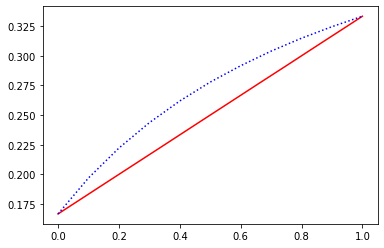

In [19]:
# 画图
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_lines(X, Y, color):
    plt.plot(X, Y, color)
    
plot_lines(pcosts, costs_norm, "r")
plot_lines(p, costs_norm, "b:")
plt.show()